# Coursera Project - Battle of the Neighborhoods (Week 5)

### Importing and Installing the required Libraries

In [1]:
import pandas as pd
!conda install -c anaconda lxml --yes
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

import json # library to handle JSON files
import numpy as np
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
!conda install -c conda-forge geocoder --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - lxml


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2020.6.2~ --> anaconda::ca-certificates-2020.6.24-0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2020.6.20-py36h9~ --> anaconda::certifi-2020.6.20-py36_0
  openssl            conda-forge::openssl-1.1.1g-h516909a_0 --> anaconda::openssl-1.1.1g-h7b6447c_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates     anaconda::ca-certificates-2020.6.24-0 --> conda-forge::ca-certificates-2020.6.20-hecda079_0
  certifi           

### Getting the cities in the Colombo district using Wikipedia and cleaning the data 

In [2]:
#The url was read and stored in a pandas data frame
url = 'https://en.wikipedia.org/wiki/Postal_codes_in_Sri_Lanka'
dfs = pd.read_html(url)
#the 3rd table contained the required data
df = dfs[2]
df

,City/town,Post Code,City/town.1,Post Code.1,City/town.2,Post Code.2
0,Akarawita,10732,Hanwella,10650,Padukka,10500.0
1,Athurugiriya,10150,Hewainna,10714,Pannipitiya,10230.0
2,Avissawella,10700,Hiripitya,10232,Piliyandala,10300.0
3,Batawala,10513,Hokandara,10118,Pitipana Homagama,10206.0
4,Battaramulla,10120,Homagama,10200,Polgasowita,10320.0
5,Batugampola,10526,Horagala,10502,Puwakpitiya,10712.0
6,Bope,10522,Kaduwela,10640,Siddamulla,10304.0
7,Boralesgamuwa,10290,Kahawa,10508,Slave Island,200.0
8,Borella,800,Kalatuwawa,10718,Sri Jayawardenepura,10100.0
9,Dedigamuwa,10656,Madapatha,10306,Talawatugoda,10116.0


In [3]:
#cleaning the data to observe the full table
df1 = df[['City/town','Post Code']]
df2 = df[['City/town.1','Post Code.1']]
df3 = df[['City/town.2','Post Code.2']]

df2.rename(columns={"City/town.1": "City/town","Post Code.1": "Post Code"}, inplace=True)
df3.rename(columns={"City/town.2": "City/town","Post Code.2": "Post Code"}, inplace=True)
df.rename(columns={"City/town.1": "City/town","City/town.2": "City/town","Post Code.1": "Post Code","Post Code.2": "Post Code"}, inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [4]:
#concatanating all 3 data frames to obtain the final dataframe
colombo = pd.concat([df1, df2, df3], ignore_index=True)
colombo.dropna(subset = ["City/town","Post Code"], inplace=True)
colombo.rename(columns={"City/town": "City"}, inplace=True)
colombo = colombo[["Post Code","City"]]
colombo

,Post Code,City
0,10732.0,Akarawita
1,10150.0,Athurugiriya
2,10700.0,Avissawella
3,10513.0,Batawala
4,10120.0,Battaramulla
5,10526.0,Batugampola
6,10522.0,Bope
7,10290.0,Boralesgamuwa
8,800.0,Borella
9,10656.0,Dedigamuwa


### Obtaining the Coordinates of all the cities in the Colombo District 

In [5]:
#A list was created with all the names of the cities
city_names = colombo['City'].to_list()
# Dataframe was created using the city names
city_df = pd.DataFrame({"City": city_names})
city_df.head()

,City
0,Akarawita
1,Athurugiriya
2,Avissawella
3,Batawala
4,Battaramulla


In [6]:
import geocoder
# define a function to get coordinates
def get_latlng(city):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Colombo, Sri Lanka'.format(city))
        lat_lng_coords = g.latlng
    return lat_lng_coords
#the coordinates were obained and stored as a list
coords = [ get_latlng(city) for city in city_df["City"].tolist() ]


In [7]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
# merge the coordinates into the original dataframe
city_df['Latitude'] = df_coords['Latitude']
city_df['Longitude'] = df_coords['Longitude']
city_df

,City,Latitude,Longitude
0,Akarawita,6.940720,80.112670
1,Athurugiriya,6.871670,79.997320
2,Avissawella,6.952910,80.212760
3,Batawala,6.877510,80.056060
4,Battaramulla,6.905200,79.915540
5,Batugampola,6.767230,80.142740
6,Bope,6.833470,80.130510
7,Boralesgamuwa,6.840820,79.904450
8,Borella,6.916700,79.877590
9,Dedigamuwa,6.894150,80.023430


### Creating a Map of Colombo and superimposing all the districts onto the map

In [8]:
address = 'Colombo'

geolocator = Nominatim(user_agent="colombo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Colombo are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Colombo are 6.9349969, 79.8538463.


In [9]:
map_colombo = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, city in zip(city_df['Latitude'], city_df['Longitude'], city_df['City']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_colombo)   
    
map_colombo

### Getting the data of the venues in each city using Foursquare

In [10]:
CLIENT_ID = 'T55L4CTFITK22H33REQLTF5LRHBUSJAYGRCKVTKQANXVMMUI' # your Foursquare ID
CLIENT_SECRET = '2GO54N2DN0UXAY1JEQXJZOLAVCJWNT4NVFNWO5ILI4P3JZWZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: T55L4CTFITK22H33REQLTF5LRHBUSJAYGRCKVTKQANXVMMUI
CLIENT_SECRET:2GO54N2DN0UXAY1JEQXJZOLAVCJWNT4NVFNWO5ILI4P3JZWZ


In [11]:
#Getting the data about the venues around the cities of the colombo district 
radius = 1000
LIMIT = 100

venues = []

for lat, long, city in zip(city_df['Latitude'], city_df['Longitude'], city_df['City']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            city,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [12]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)
# define the column names
venues_df.columns = ['City', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']
print(venues_df.shape)
venues_df.head()

(594, 7)


,City,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Akarawita,6.94072,80.11267,Pugoda,6.938889,80.109567,Coffee Shop
1,Akarawita,6.94072,80.11267,Muruthagama Ground,6.945136,80.119926,Playground
2,Athurugiriya,6.87167,79.99732,Walgama Junction,6.869385,79.994476,Intersection
3,Athurugiriya,6.87167,79.99732,Old Athurugiriya Junction,6.868566,80.001166,Bus Stop
4,Athurugiriya,6.87167,79.99732,Araliya Hotel,6.868456,80.001416,Food Stand


In [13]:
# Number of venues obtained in each city was observed
venues_df.groupby('City').count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
City,,,,,,
Akarawita,2,2,2,2,2,2
Athurugiriya,4,4,4,4,4,4
Avissawella,5,5,5,5,5,5
Battaramulla,27,27,27,27,27,27
Boralesgamuwa,8,8,8,8,8,8
Borella,47,47,47,47,47,47
Dehiwala,58,58,58,58,58,58
Deltara,5,5,5,5,5,5
Fort,28,28,28,28,28,28


In [14]:
# The restraunts were extracted and anlalyzed
only_restaurant = venues_df[venues_df['VenueCategory'].str.contains('Restaurant')].reset_index(drop=True)                                                   
only_restaurant.index = np.arange(1, len(only_restaurant)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", only_restaurant.shape)
only_restaurant.head()

Shape of the Data-Frame with Venue Category only Restaurant:  (134, 7)


,City,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
1,Battaramulla,6.9052,79.91554,Ginza on the Edge,6.905975,79.911615,Japanese Restaurant
2,Battaramulla,6.9052,79.91554,Pranzo,6.906033,79.911777,Italian Restaurant
3,Battaramulla,6.9052,79.91554,McDonald's,6.903367,79.911720,Fast Food Restaurant
4,Battaramulla,6.9052,79.91554,Dinemore,6.899238,79.922145,Fast Food Restaurant
5,Battaramulla,6.9052,79.91554,Pillawoos,6.902067,79.918643,Asian Restaurant


In [15]:
# The types of restraunts and the most frequent ones were observed
print (only_restaurant['VenueCategory'].value_counts())

Restaurant                       32
Chinese Restaurant               22
Fast Food Restaurant             20
Asian Restaurant                 18
Seafood Restaurant                8
Italian Restaurant                6
Indian Restaurant                 5
Japanese Restaurant               4
Vegetarian / Vegan Restaurant     2
Cantonese Restaurant              2
Comfort Food Restaurant           2
Thai Restaurant                   2
German Restaurant                 2
English Restaurant                1
South Indian Restaurant           1
Indian Chinese Restaurant         1
Mediterranean Restaurant          1
Korean Restaurant                 1
Cuban Restaurant                  1
Falafel Restaurant                1
Sri Lankan Restaurant             1
Malay Restaurant                  1
Name: VenueCategory, dtype: int64


In [16]:
# The cities with the most restaurants was observed
print (only_restaurant['City'].value_counts())

Slave Island           20
Nugegoda               17
Dehiwala               14
Sri Jayawardenepura    13
Rajagiriya              9
Fort                    7
Battaramulla            6
Borella                 6
Maharagama              6
Malabe                  5
Talawatugoda            3
Hokandara               3
Piliyandala             3
Homagama                2
Hanwella                2
Deltara                 2
Kaduwela                2
Ranala                  2
Pitipana Homagama       2
Pannipitiya             2
Meegoda                 2
Boralesgamuwa           1
Kalatuwawa              1
Siddamulla              1
Puwakpitiya             1
Habarakada              1
Hiripitya               1
Name: City, dtype: int64


#### When Selecting an area to start the restaurant, we have to select the area with the highest foot traffic and most developed. Hence it was decided that the cities with the 10 most highest venues was to be used for our analysis based on the data we observed above

In [17]:
#Cities with the most venues were grouped togther and a new dataframe was created
df1 = venues_df.set_index("City", drop = True)
Colombo_top10_df=df1.loc[["Battaramulla","Borella","Dehiwala","Fort","Hokandara","Maharagama","Nugegoda","Rajagiriya","Slave Island","Sri Jayawardenepura"],:]
Colombo_top10_df.reset_index(inplace = True, drop = False)
Colombo_top10_df.head()

,City,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Battaramulla,6.9052,79.91554,Diyawannawa,6.902994,79.911839,Lake
1,Battaramulla,6.9052,79.91554,Diyatha Uyana,6.903716,79.910571,Park
2,Battaramulla,6.9052,79.91554,The Long Bar,6.906073,79.912182,Cocktail Bar
3,Battaramulla,6.9052,79.91554,Arpico Super Center,6.902215,79.917139,Department Store
4,Battaramulla,6.9052,79.91554,Jogging Track,6.904497,79.909625,Track


In [18]:
#The selected Cities along with their coordinates were stored into a dataframe
df2 = city_df.set_index("City", drop = True)
top10_city_df=df2.loc[["Battaramulla","Borella","Dehiwala","Fort","Hokandara","Maharagama","Nugegoda","Rajagiriya","Slave Island","Sri Jayawardenepura"],:]
top10_city_df.reset_index(inplace = True, drop = False)
top10_city_df.head()

,City,Latitude,Longitude
0,Battaramulla,6.905200,79.915540
1,Borella,6.916700,79.877590
2,Dehiwala,6.851340,79.865940
3,Fort,6.941480,79.846640
4,Hokandara,6.876465,79.935725


### Each city was analyzed and cities were grouped by taking the mean of the frequency of occurrence of each category

In [19]:
# one hot encoding
colombo_onehot = pd.get_dummies(Colombo_top10_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
colombo_onehot['City'] = Colombo_top10_df['City'] 

# move neighborhood column to the first column
fixed_columns = [colombo_onehot.columns[-1]] + list(colombo_onehot.columns[:-1])
colombo_onehot = colombo_onehot[fixed_columns]

colombo_onehot.head()

,City,Accessories Store,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Baby Store,Bakery,Bar,...,Tea Room,Tennis Stadium,Thai Restaurant,Theater,Track,Train Station,Vegetarian / Vegan Restaurant,Video Store,Water Park,Women's Store
0,Battaramulla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Battaramulla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Battaramulla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Battaramulla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Battaramulla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
# Rows were grouped by city and by taking the mean of the frequency of occurence in each category
colombo_grouped = colombo_onehot.groupby('City').mean().reset_index()
colombo_grouped

,City,Accessories Store,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Baby Store,Bakery,Bar,...,Tea Room,Tennis Stadium,Thai Restaurant,Theater,Track,Train Station,Vegetarian / Vegan Restaurant,Video Store,Water Park,Women's Store
0,Battaramulla,0.000000,0.00000,0.000000,0.037037,0.000000,0.000000,0.037037,0.111111,0.037037,...,0.037037,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.00000,0.00000,0.000000
1,Borella,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042553,0.021277,...,0.021277,0.021277,0.000000,0.021277,0.000000,0.021277,0.021277,0.00000,0.00000,0.021277
2,Dehiwala,0.000000,0.00000,0.000000,0.034483,0.017241,0.000000,0.000000,0.034483,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.00000,0.00000,0.017241
3,Fort,0.000000,0.00000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,...,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.035714
4,Hokandara,0.000000,0.00000,0.000000,0.045455,0.000000,0.000000,0.000000,0.045455,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.00000,0.00000,0.000000
5,Maharagama,0.000000,0.00000,0.000000,0.030303,0.000000,0.000000,0.000000,0.151515,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.030303
6,Nugegoda,0.000000,0.00000,0.000000,0.097561,0.024390,0.000000,0.000000,0.048780,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.024390,0.024390,0.02439,0.00000,0.000000
7,Rajagiriya,0.030303,0.00000,0.000000,0.060606,0.000000,0.030303,0.000000,0.090909,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
8,Slave Island,0.000000,0.01087,0.000000,0.021739,0.000000,0.000000,0.000000,0.000000,0.054348,...,0.021739,0.000000,0.010870,0.000000,0.000000,0.010870,0.000000,0.00000,0.01087,0.000000
9,Sri Jayawardenepura,0.000000,0.00000,0.000000,0.046512,0.000000,0.023256,0.000000,0.023256,0.023256,...,0.023256,0.000000,0.023256,0.000000,0.023256,0.000000,0.000000,0.00000,0.00000,0.000000


### Cities along with their top 5 most common venues were obtained and then organized into a pandas Dataframe

In [21]:
num_top_venues = 5

for hood in colombo_grouped['City']:
    print("----"+hood+"----")
    temp = colombo_grouped[colombo_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battaramulla----
                  venue  freq
0  Fast Food Restaurant  0.11
1                Bakery  0.11
2    Italian Restaurant  0.04
3     Electronics Store  0.04
4          Dessert Shop  0.04


----Borella----
               venue  freq
0               Café  0.09
1              Hotel  0.06
2        Flower Shop  0.04
3  Convenience Store  0.04
4     Cosmetics Shop  0.04


----Dehiwala----
                venue  freq
0      Clothing Store  0.09
1      Cosmetics Shop  0.07
2         Pizza Place  0.07
3          Restaurant  0.05
4  Chinese Restaurant  0.03


----Fort----
               venue  freq
0  Indian Restaurant  0.11
1      Jewelry Store  0.11
2              Hotel  0.07
3                Bar  0.07
4      Women's Store  0.04


----Hokandara----
         venue  freq
0  Supermarket  0.14
1          Gym  0.14
2         Park  0.09
3         Café  0.09
4        Track  0.09


----Maharagama----
                venue  freq
0              Bakery  0.15
1  Chinese Restaurant  0.12
2   

In [22]:
#function to find the most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [23]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = colombo_grouped['City']

for ind in np.arange(colombo_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(colombo_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battaramulla,Bakery,Fast Food Restaurant,Coffee Shop,Food,Park,Department Store,Cocktail Bar,Clothing Store,Dessert Shop,Lake
1,Borella,Café,Hotel,Flower Shop,Bakery,Cosmetics Shop,Convenience Store,Hotel Bar,Chinese Restaurant,Pharmacy,Park
2,Dehiwala,Clothing Store,Cosmetics Shop,Pizza Place,Restaurant,Seafood Restaurant,Shopping Mall,Chinese Restaurant,Café,Burger Joint,Fast Food Restaurant
3,Fort,Jewelry Store,Indian Restaurant,Bar,Hotel,Women's Store,English Restaurant,Market,Cocktail Bar,Lighthouse,Pizza Place
4,Hokandara,Gym,Supermarket,Park,Track,Café,Shopping Plaza,Food Court,Pizza Place,Restaurant,Fast Food Restaurant


## Clustering Neighborhoods

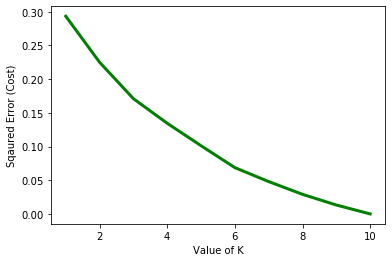

In [24]:
#Selecting the best k for our Kmeans algorithm
colombo_grouped_clustering = colombo_grouped.drop('City', 1)
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(colombo_grouped_clustering) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 
  
# the point of the elbow is the  
# most optimal value for choosing k 

In [25]:
# set number of clusters
kclusters = 6

#colombo_grouped_clustering = colombo_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(colombo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 3, 0, 1, 2, 5, 0, 0, 3, 0], dtype=int32)

In [26]:
# add clustering labels
city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

colombo_merged = top10_city_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
colombo_merged = colombo_merged.join(city_venues_sorted.set_index('City'), on='City')
colombo_merged.head() 

,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battaramulla,6.905200,79.915540,4,Bakery,Fast Food Restaurant,Coffee Shop,Food,Park,Department Store,Cocktail Bar,Clothing Store,Dessert Shop,Lake
1,Borella,6.916700,79.877590,3,Café,Hotel,Flower Shop,Bakery,Cosmetics Shop,Convenience Store,Hotel Bar,Chinese Restaurant,Pharmacy,Park
2,Dehiwala,6.851340,79.865940,0,Clothing Store,Cosmetics Shop,Pizza Place,Restaurant,Seafood Restaurant,Shopping Mall,Chinese Restaurant,Café,Burger Joint,Fast Food Restaurant
3,Fort,6.941480,79.846640,1,Jewelry Store,Indian Restaurant,Bar,Hotel,Women's Store,English Restaurant,Market,Cocktail Bar,Lighthouse,Pizza Place
4,Hokandara,6.876465,79.935725,2,Gym,Supermarket,Park,Track,Café,Shopping Plaza,Food Court,Pizza Place,Restaurant,Fast Food Restaurant


In [27]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(colombo_merged['Latitude'], colombo_merged['Longitude'], colombo_merged['City'], colombo_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examining the clusters

## Cluster 0

In [29]:
colombo_merged.loc[colombo_merged['Cluster Labels'] == 0, colombo_merged.columns[[0] + list(range(5, colombo_merged.shape[1]))]]

,City,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Dehiwala,Cosmetics Shop,Pizza Place,Restaurant,Seafood Restaurant,Shopping Mall,Chinese Restaurant,Café,Burger Joint,Fast Food Restaurant
6,Nugegoda,Fast Food Restaurant,Restaurant,Chinese Restaurant,Bakery,Supermarket,Clothing Store,Park,Pizza Place,Bookstore
7,Rajagiriya,Clothing Store,Restaurant,Chinese Restaurant,Pizza Place,Supermarket,Asian Restaurant,Farmers Market,Italian Restaurant,Fast Food Restaurant
9,Sri Jayawardenepura,Fast Food Restaurant,Supermarket,Clothing Store,Café,Asian Restaurant,Dessert Shop,Coffee Shop,Bus Station,Italian Restaurant


## Cluster 1

In [31]:
colombo_merged.loc[colombo_merged['Cluster Labels'] == 1, colombo_merged.columns[[0] + list(range(5, colombo_merged.shape[1]))]]

,City,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Fort,Indian Restaurant,Bar,Hotel,Women's Store,English Restaurant,Market,Cocktail Bar,Lighthouse,Pizza Place


## Cluster 2

In [32]:
colombo_merged.loc[colombo_merged['Cluster Labels'] == 2, colombo_merged.columns[[0] + list(range(5, colombo_merged.shape[1]))]]

,City,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Hokandara,Supermarket,Park,Track,Café,Shopping Plaza,Food Court,Pizza Place,Restaurant,Fast Food Restaurant


## Cluster 3

In [33]:
colombo_merged.loc[colombo_merged['Cluster Labels'] == 3, colombo_merged.columns[[0] + list(range(5, colombo_merged.shape[1]))]]

,City,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Borella,Hotel,Flower Shop,Bakery,Cosmetics Shop,Convenience Store,Hotel Bar,Chinese Restaurant,Pharmacy,Park
8,Slave Island,Restaurant,Bar,Seafood Restaurant,Coffee Shop,Lounge,Pub,Steakhouse,Nightclub,General Travel


## Cluster 4

In [34]:
colombo_merged.loc[colombo_merged['Cluster Labels'] == 4, colombo_merged.columns[[0] + list(range(5, colombo_merged.shape[1]))]]

,City,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battaramulla,Fast Food Restaurant,Coffee Shop,Food,Park,Department Store,Cocktail Bar,Clothing Store,Dessert Shop,Lake


## Cluster 5

In [35]:
colombo_merged.loc[colombo_merged['Cluster Labels'] == 5, colombo_merged.columns[[0] + list(range(5, colombo_merged.shape[1]))]]

,City,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Maharagama,Chinese Restaurant,Supermarket,Bus Station,Pizza Place,Clothing Store,Shopping Mall,Gym / Fitness Center,Ice Cream Shop,Food
